In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([[0],[1],[1],[0]], dtype=float)

In [3]:
# Activation functions
def sigmoid(z): return 1/(1+np.exp(-z))
def dsigmoid(a): return a*(1-a)
def relu(z): return np.maximum(0,z)
def drelu(z): return (z>0).astype(float)

In [4]:
class MLP:
    def __init__(self, act="sigmoid"):
        self.W1 = np.random.randn(2,2)*0.5; self.b1 = np.zeros((1,2))
        self.W2 = np.random.randn(2,1)*0.5; self.b2 = np.zeros((1,1))
        self.act = act
    def forward(self,X):
        self.z1 = X@self.W1 + self.b1
        self.h = sigmoid(self.z1) if self.act=="sigmoid" else relu(self.z1)
        self.z2 = self.h@self.W2 + self.b2
        self.yhat = sigmoid(self.z2)
        return self.yhat
    def backward(self,X,y,lr):
        m = len(X)
        d2 = (self.yhat-y)*dsigmoid(self.yhat)   # (N,1)
        dW2 = self.h.T@d2; db2 = d2.sum(0,keepdims=True)
        dh = d2@self.W2.T
        dz1 = dh*(dsigmoid(self.h) if self.act=="sigmoid" else drelu(self.z1))
        dW1 = X.T@dz1; db1 = dz1.sum(0,keepdims=True)
        # update
        self.W1 -= lr*dW1; self.b1 -= lr*db1
        self.W2 -= lr*dW2; self.b2 -= lr*db2

In [5]:
def predict(m,X,t=0.5): return (m.forward(X)>=t).astype(int)
def confusion(y,yp):
    y,yp=y.ravel(),yp.ravel()
    TP=((y==1)&(yp==1)).sum(); TN=((y==0)&(yp==0)).sum()
    FP=((y==0)&(yp==1)).sum(); FN=((y==1)&(yp==0)).sum()
    return TP,TN,FP,FN
def metrics(y,yp):
    TP,TN,FP,FN = confusion(y,yp)
    acc=(TP+TN)/(TP+TN+FP+FN)
    prec=TP/(TP+FP) if TP+FP else 0
    rec=TP/(TP+FN) if TP+FN else 0
    f1=2*prec*rec/(prec+rec) if prec+rec else 0
    return acc,prec,rec,f1

In [6]:
def train(act,lr,epochs):
    m=MLP(act); losses=[]
    for i in range(epochs):
        yhat=m.forward(X); loss=0.5*np.mean((y-yhat)**2)
        losses.append(loss); m.backward(X,y,lr)
    return m,losses


In [7]:
model,losses=train(act="sigmoid",lr=0.1,epochs=5000)

In [8]:
yp=predict(model,X)
acc,prec,rec,f1=metrics(y,yp)
print(f"Accuracy={acc:.2f}, Precision={prec:.2f}, Recall={rec:.2f}, F1={f1:.2f}")

Accuracy=0.75, Precision=0.67, Recall=1.00, F1=0.80


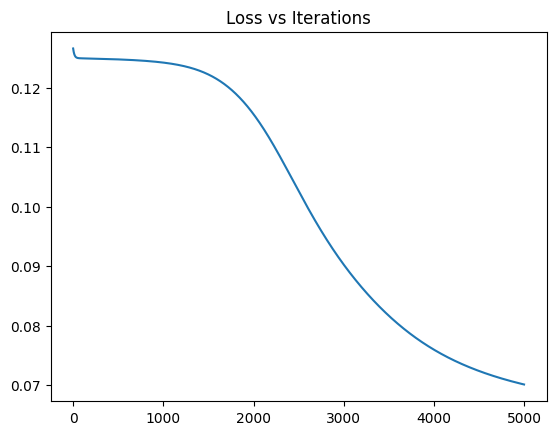

In [9]:
plt.plot(losses); plt.title("Loss vs Iterations"); plt.show()

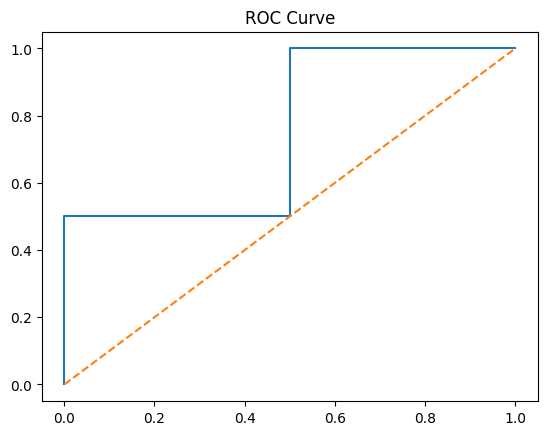

In [10]:
proba=model.forward(X).ravel()
tpr,fpr=[],[]
for t in np.linspace(0,1,100):
    yp=(proba>=t).astype(int)
    TP,TN,FP,FN=confusion(y,yp)
    tpr.append(TP/(TP+FN) if TP+FN else 0)
    fpr.append(FP/(FP+TN) if FP+TN else 0)
plt.plot(fpr,tpr); plt.plot([0,1],[0,1],"--")
plt.title("ROC Curve"); plt.show()